In [1]:
%pwd

'C:\\Users\\HP\\Desktop\\analytixlab\\Data Science Python\\Class 17-18 files\\HR Case Study'

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.isnull().any().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [8]:
left_df = pd.DataFrame(df.left.value_counts())
left_df

,left
0,11428
1,3571


In [9]:
#1. What is the percentage of churn by salary bucket
salary_count = df[['salary','left']].groupby(['salary','left']).size().reset_index()

In [10]:
salary_count.columns = ['salary','left','count']
salary_count.head()

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129


In [11]:
salary_count = df[['salary','left']].groupby(['salary','left']).size()
salary_percent = salary_count.groupby(level=[0]).apply(lambda x: x/ x.sum()).reset_index()

In [12]:
salary_percent

,salary,left,0
0,high,0,0.933711
1,high,1,0.066289
2,low,0,0.703116
3,low,1,0.296884
4,medium,0,0.795687
5,medium,1,0.204313


In [13]:
import matplotlib as plt
import seaborn as sn
%matplotlib inline

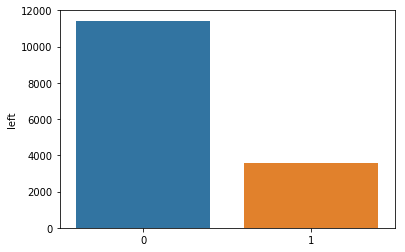

In [14]:
sn.barplot( left_df.index,left_df.left)

In [15]:
# 2. How many people, who had work accidents, actually left the company?
work_accident_count = df[['Work_accident','left']].groupby(['Work_accident','left']).size().reset_index()
work_accident_count.columns = ['Work_accident','left','count']
work_accident_count

,Work_accident,left,count
0,0,0,9428
1,0,1,3402
2,1,0,2000
3,1,1,169


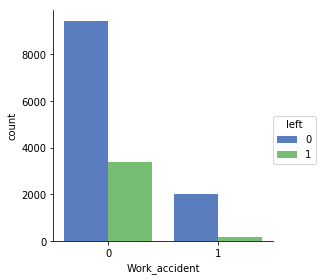

In [16]:
sn.factorplot(x='Work_accident',y = 'count',hue='left',data= work_accident_count,
                size=4,kind='bar',palette='muted')

In [17]:
work_accident_count = df[['Work_accident','left']].groupby(['Work_accident','left']).size()
work_accident_percent = work_accident_count.groupby(level=[0]).apply(lambda x: x/x.sum()).reset_index()

In [18]:
work_accident_percent.columns = ['Work_accident','left','percent']
work_accident_percent

,Work_accident,left,percent
0,0,0,0.734840
1,0,1,0.265160
2,1,0,0.922084
3,1,1,0.077916


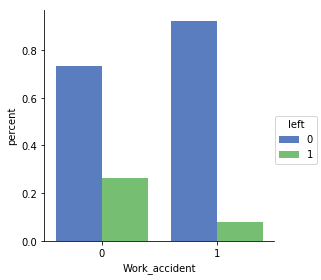

In [19]:
sn.factorplot(x='Work_accident',y= 'percent',hue='left',data= work_accident_percent,size=4,kind='bar',palette ='muted')

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


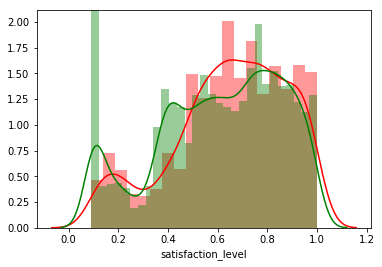

In [20]:
#3. How work accidents have impacted the statisfactin level of the empolyees?
sn.distplot( df[df.Work_accident == 1]['satisfaction_level'],color = 'r')
sn.distplot( df[df.Work_accident == 0]['satisfaction_level'],color = 'g')

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


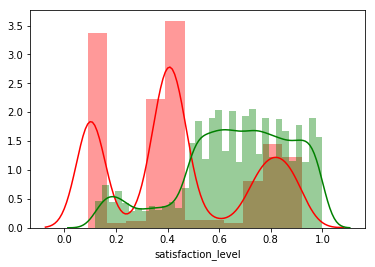

In [21]:
#4. How satisfaction levels influence whether to stay or leave the company?
sn.distplot(df[df.left==1]['satisfaction_level'],color='r')
sn.distplot(df[df.left==0]['satisfaction_level'],color='g')

In [22]:
#5. Average satisfaction levels for people who leave and stay back in the company
sl_left_mean = np.mean(df[df.left==0]['satisfaction_level'])
sl_left_mean

0.666809590479516

In [23]:
np.mean(df[df.left==1]['satisfaction_level'])

0.44009801176140917

In [24]:
np.std(df[df.left==0]['satisfaction_level'])

0.21709425554771716

In [25]:
np.std(df[df.left==1]['satisfaction_level'])

0.2638964784854295

#hypothesis test:
* ho: average satisfaction level of people leaving is same as average satisfaction of people staying
* h1: average satisfaction level of people leaving is less then as average satisfaction of people staying


In [26]:
from scipy import stats
stats.ttest_ind(df[df.left==1]['satisfaction_level'],df[df.left==0]['satisfaction_level'])

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


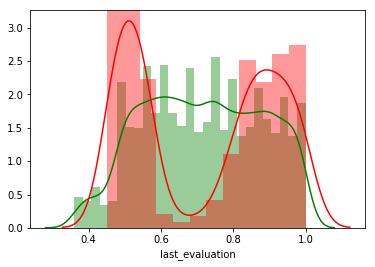

In [27]:
# 6. How last evaluation scores influencing whether to stay or leave the company?
sn.distplot(df[df.left==0]['last_evaluation'],color='g')
sn.distplot(df[df.left==1]['last_evaluation'],color='r')

In [28]:
# 7. How time spent in company influences attrition?
time_spend_count = df[['time_spend_company','left']].groupby(['time_spend_company','left']).size()
time_spend_percent = time_spend_count.groupby(level=[0]).apply(lambda x: x/x.sum()).reset_index()
time_spend_percent.columns = ['time_spend_company','left','percent']
time_spend_percent

,time_spend_company,left,percent
0,2,0,0.983662
1,2,1,0.016338
2,3,0,0.753841
3,3,1,0.246159
4,4,0,0.651936
5,4,1,0.348064
6,5,0,0.434487
7,5,1,0.565513
8,6,0,0.708914
9,6,1,0.291086


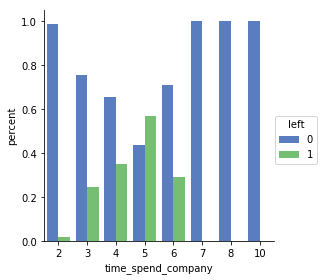

In [29]:
sn.factorplot(x='time_spend_company',y= 'percent',hue ='left',data=time_spend_percent,
              size=4,kind='bar',palette = 'muted'  )

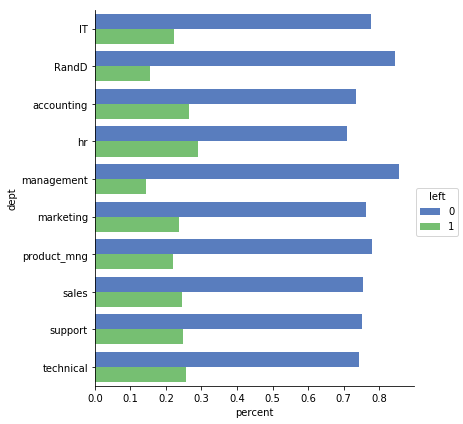

In [30]:
# 8. Which department has maximum attrition?
dept_count = df[['department','left']].groupby(['department','left']).size()
dept_count_percent=dept_count.groupby(level=[0]).apply(lambda x: x/x.sum()).reset_index()
dept_count_percent.columns=['dept','left','percent']
sn.factorplot(x='percent',
             y='dept',
             hue='left',
             data=dept_count_percent,
             size=6,
             kind='bar',palette='muted')

In [31]:
# 9. Effect of whether someone got promoted in last 5 years?
pd.crosstab(df.promotion_last_5years,df.left)

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


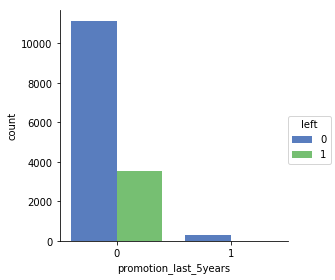

In [32]:
sn.factorplot(x='promotion_last_5years',hue='left',data=df,size=4,kind='count',palette='muted')

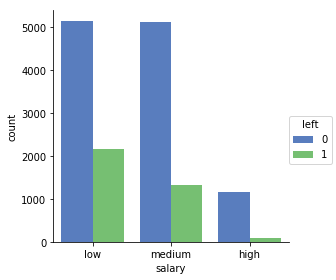

In [33]:
#10.  How Salary is influencing attrition decisions?
sn.factorplot(x='salary',hue='left',data=df,size=4,kind='count',palette='muted')

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


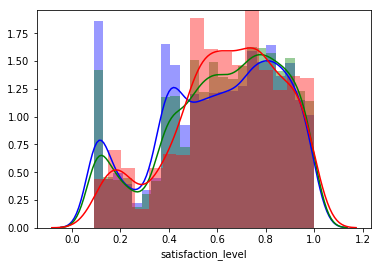

In [34]:
#11. Does higher salary lead to higher satisfaction level?
sn.distplot(df[df.salary=='low']['satisfaction_level'],color='b')
sn.distplot(df[df.salary=='medium']['satisfaction_level'],color='g')
sn.distplot(df[df.salary=='high']['satisfaction_level'],color='r')

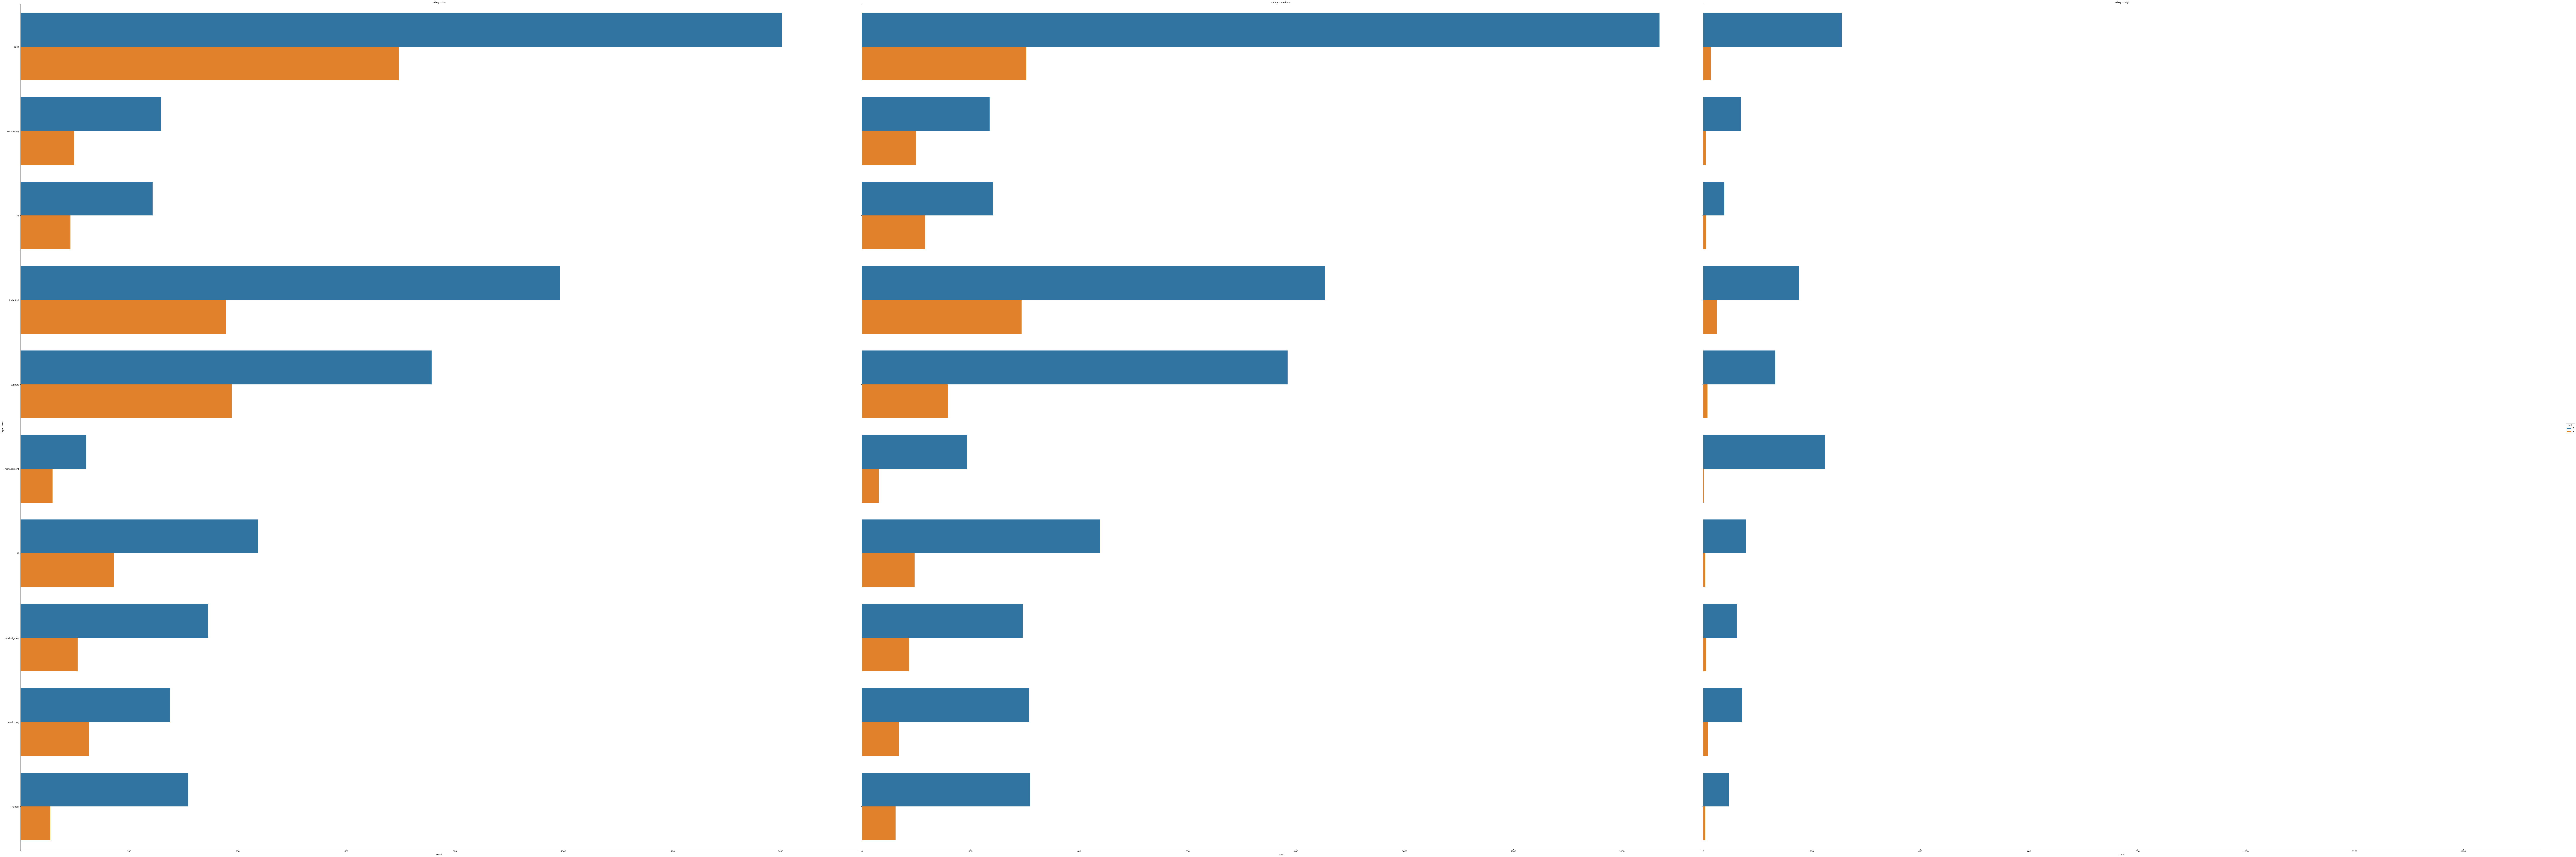

In [35]:
#12.How salaries across departments are related to attrition?
sn.factorplot(y='department',col='salary',hue='left',data=df,kind='count',size=55)

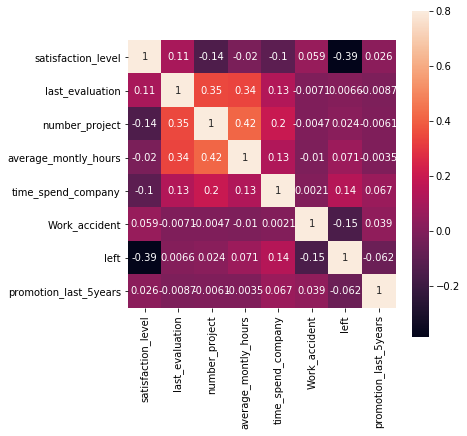

In [36]:
# 13. Lets check corrleation between Variables
corrmat = df.corr()
f,ax =plt.pyplot.subplots(figsize=(6,6))
sn.heatmap(corrmat,vmax=.8,square= True,annot=True)
plt.pyplot.show()

In [37]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [14]:
numeric_features=['satisfaction_level','last_evaluation','number_project','average_monthly_hours','time_spend_company']

categorical_features= ['Work_accident','promotion_last_5years','department','salary']

In [15]:
def create_dummies(df,colname):
    col_dummies= pd.get_dummies(df[colname],prefix=colname)
    col_dummies.drop(col_dummies.columns[0],axis=1,inplace= True)
    df = pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace = True)
    return df


In [16]:
for c_features in categorical_features:
    df= create_dummies(df,c_features)

In [1]:
data.head()

NameError: name 'data' is not defined

In [18]:
feature_columns = df.columns.difference(['left'])
feature_columns1= feature_columns[1:5]

In [19]:
feature_columns1

Index(['average_montly_hours', 'department_RandD', 'department_accounting',
       'department_hr'],
      dtype='object')

In [20]:
feature_columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years_1', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [21]:
from sklearn.cross_validation import train_test_split

train_x,test_x,train_y,test_y=train_test_split(df[feature_columns],
                                              df['left'],
                                              test_size=0.2,
                                              random_state = 22)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_x, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
logreg_coef=list(zip(feature_columns,logreg.coef_[0]))
logreg_coef

[('Work_accident_1', -1.505582476555407),
 ('average_montly_hours', 0.004031771407777747),
 ('department_RandD', -0.4417662894943082),
 ('department_accounting', 0.10590695063857615),
 ('department_hr', 0.32414568002499605),
 ('department_management', -0.3135282663949288),
 ('department_marketing', 0.07699263667062999),
 ('department_product_mng', -0.07014819635319988),
 ('department_sales', 0.06589214561750563),
 ('department_support', 0.1328443473785657),
 ('department_technical', 0.16921243830298224),
 ('last_evaluation', 0.6155437972733041),
 ('number_project', -0.3036205287458226),
 ('promotion_last_5years_1', -1.0690035941931542),
 ('salary_low', 1.7320045357287175),
 ('salary_medium', 1.1988576568267169),
 ('satisfaction_level', -4.047032010096483),
 ('time_spend_company', 0.26044313948458525)]

In [24]:
logreg.intercept_

array([-1.28267156])

In [25]:
test_pred = pd.DataFrame({'achual': test_y,
                          'predicted': logreg.predict(test_x)
})

In [26]:
test_pred=test_pred.reset_index()

In [27]:
test_pred.head()

,index,achual,predicted
0,2957,0,0
1,2269,0,0
2,13582,0,0
3,13447,0,0
4,4275,0,0


In [28]:
test_pred.sample(n=10)

,index,achual,predicted
1263,6784,0,0
1055,3675,0,0
1228,1808,1,1
1562,3063,0,0
2287,14578,1,0
152,9675,0,0
1002,3116,0,0
1374,848,1,0
1895,0,1,1
336,14622,1,0


In [59]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_pred.achual,
                             test_pred.predicted,[1,0])
cm

array([[ 281,  461],
       [ 151, 2107]], dtype=int64)

AttributeError: module 'matplotlib' has no attribute 'ylabel'

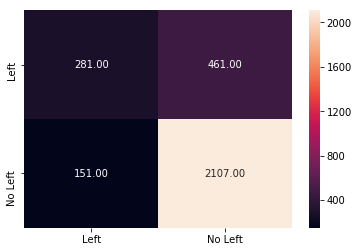

In [60]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
score=metrics.accuracy_score(test_pred.achual,test_pred.predicted)
round(float(score),2)

In [61]:
print (test_x[:1])
print(logreg.predict_proba(test_x[:1]))

      Work_accident_1  average_montly_hours  department_RandD  \
2957                0                   269                 0   

      department_accounting  department_hr  department_management  \
2957                      0              0                      0   

      department_marketing  department_product_mng  department_sales  \
2957                     0                       0                 0   

      department_support  department_technical  last_evaluation  \
2957                   1                     0              0.7   

      number_project  promotion_last_5years_1  salary_low  salary_medium  \
2957               5                        0           0              1   

      satisfaction_level  time_spend_company  
2957                0.75                   3  
[[0.90092899 0.09907101]]


In [62]:
predict_proba_df=pd.DataFrame(logreg.predict_proba(test_x))
predict_proba_df.head()

,0,1
0,0.900929,0.099071
1,0.852958,0.147042
2,0.937438,0.062562
3,0.897824,0.102176
4,0.987643,0.012357


In [63]:
test_pred=pd.concat([test_pred,predict_proba_df],axis =1)

In [64]:
test_pred.columns =['index','achual','predicted','left_0','left_1']
test_pred.head()

,index,achual,predicted,left_0,left_1
0,2957,0,0,0.900929,0.099071
1,2269,0,0,0.852958,0.147042
2,13582,0,0,0.937438,0.062562
3,13447,0,0,0.897824,0.102176
4,4275,0,0,0.987643,0.012357


In [65]:
auc_score = metrics.roc_auc_score(test_pred.achual,test_pred.left_1)
round(float(auc_score),2)

0.82

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


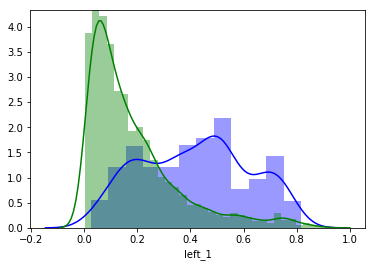

In [66]:
sn.distplot(test_pred[test_pred.achual==1]['left_1'],color ='b')
sn.distplot(test_pred[test_pred.achual==0]['left_1'],color= 'g')

In [67]:
test_pred.achual

0       0
1       0
2       0
3       0
4       0
5       1
6       1
7       0
8       0
9       0
10      0
11      0
12      1
13      0
14      0
15      0
16      0
17      1
18      1
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2970    0
2971    1
2972    0
2973    0
2974    0
2975    1
2976    0
2977    0
2978    0
2979    0
2980    0
2981    0
2982    0
2983    0
2984    0
2985    0
2986    0
2987    1
2988    1
2989    0
2990    1
2991    0
2992    1
2993    1
2994    0
2995    0
2996    1
2997    0
2998    0
2999    0
Name: achual, Length: 3000, dtype: int64

In [68]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( test_pred.actual,
                                     test_pred.Left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'actual'

In [ ]:
fpr,tpr,thresholds = metrics.roc_curve(test_pred.achual,
                                      test_pred.left_1,
                                      drop_intermediate= False)



In [ ]:
print(fpr[0:10])
print(tpr[0:10])
print(thresholds[0:10])

In [ ]:
cutoff_prob = thresholds[(np.abs(tpr-0.7)).argmin()]

In [ ]:
round(float(cutoff_prob),2)

In [ ]:
test_pred['new_labels']= test_pred['left_1'].map(lambda x: 1if x >= 0.29 else 0)

In [ ]:
test_pred[0:10]

In [69]:
cm = metrics.confusion_matrix(test_pred.achual,
                             test_pred.new_labels,[1,0])
sn.heatmap(cm,annot=True,fmt='.2f',xticklabels= ['left','no left'],yticklabels= ['left','no left'])


AttributeError: 'DataFrame' object has no attribute 'new_labels'

# Decision Tree model

In [70]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier,export_graphviz,export
from sklearn.grid_search import GridSearchCV

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [71]:
param_grid = {'max_depth': np.arange(3,15)}

In [72]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid,cv =10)
tree.fit(train_x,train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [73]:
tree.best_params_

{'max_depth': 12}

In [74]:
tree.best_score_

0.9808317359779982

In [75]:
train_x.head(10)

,Work_accident_1,average_montly_hours,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,last_evaluation,number_project,promotion_last_5years_1,salary_low,salary_medium,satisfaction_level,time_spend_company
5452,0,271,0,0,1,0,0,0,0,0,0,0.73,4,0,1,0,0.50,2
28,0,128,0,1,0,0,0,0,0,0,0,0.46,2,0,1,0,0.41,3
1031,0,295,0,0,0,0,0,0,0,0,1,0.93,4,0,1,0,0.11,3
2489,1,156,0,0,0,0,0,0,0,1,0,0.50,3,0,0,1,0.76,3
7711,0,263,0,0,0,0,0,0,0,1,0,0.57,3,0,1,0,0.96,3
2658,0,111,0,0,0,0,0,0,0,0,0,0.98,2,0,1,0,0.76,2
8211,0,248,0,0,0,0,0,0,0,0,1,0.80,4,0,1,0,0.85,3
13213,0,137,1,0,0,0,0,0,0,0,0,0.50,3,0,1,0,0.13,5
14120,0,186,0,0,0,0,0,0,1,0,0,0.58,4,0,0,1,0.85,7
8066,0,206,0,0,0,0,0,0,0,1,0,0.77,3,0,0,1,0.97,4


In [76]:
clf_tree = DecisionTreeClassifier(max_depth = 8)
clf_tree.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
tree_test_pred = pd.DataFrame({'achual': test_y,
                              'predicted': clf_tree.predict(test_x)})

In [78]:
tree_test_pred.sample(n=10)

,achual,predicted
10771,0,0
8590,0,1
2500,0,0
10020,0,0
2452,0,0
1937,1,1
638,1,1
10456,0,0
3638,0,0
6943,0,0


In [79]:
metrics.accuracy_score(tree_test_pred.achual,tree_test_pred.predicted)

0.9786666666666667

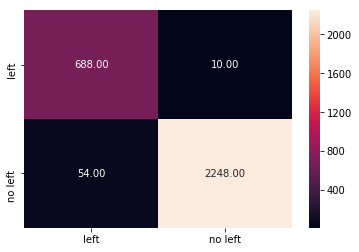

In [80]:
tree_cm = metrics.confusion_matrix(tree_test_pred.predicted,
                                  tree_test_pred.achual,
                                  [1,0])
sn.heatmap(tree_cm,annot=True,fmt='.2f',xticklabels=['left','no left'],yticklabels=['left','no left'])


# Ensemble models

In [81]:
from sklearn.ensemble import BaggingClassifier
import sklearn.ensemble as en

In [82]:
dir(en)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'VotingClassifier',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_gradient_boosting',
 'bagging',
 'base',
 'forest',
 'gradient_boosting',
 'iforest',
 'partial_dependence',
 'voting_classifier',
 'weight_boosting']

In [83]:
BaggingClassifier?

In [84]:
bagclm = BaggingClassifier(oob_score=True,n_estimators=100)
bagclm.fit(train_x,train_y)

y_pred=pd.DataFrame({'achual': test_y,'predited':bagclm.predict(test_x)})

In [85]:
bagclm.estimators_features_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([ 0

In [86]:
metrics.accuracy_score(y_pred.achual,y_pred.predited)

0.9903333333333333

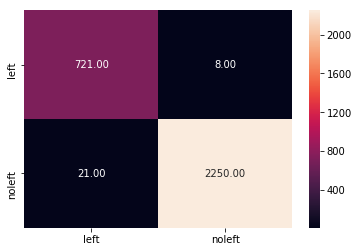

In [87]:
tree_bg= metrics.confusion_matrix(y_pred.predited,y_pred.achual,[1,0])
sn.heatmap(tree_bg,annot=True,fmt='.2f',xticklabels=['left','noleft'],yticklabels=['left','noleft'])

In [88]:
bagclm.oob_score_

0.9894157846487207

# random forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
RandomForestClassifierClassifier?

Object `RandomForestClassifierClassifier` not found.


In [91]:
radm_clf=RandomForestClassifier(oob_score=True,n_estimators=100)
radm_clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [92]:
radm_test_pred= pd.DataFrame({'achual':test_y,'predicted':radm_clf.predict(test_x)})

In [93]:
metrics.accuracy_score(radm_test_pred.achual,radm_test_pred.predicted)

0.991

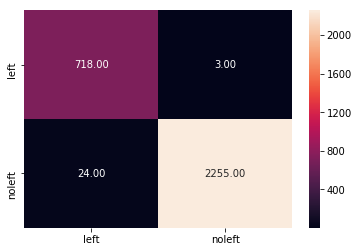

In [94]:
tree_radm=metrics.confusion_matrix(radm_test_pred.predicted,radm_test_pred.achual,[1,0])
sn.heatmap(tree_radm,annot=True,fmt='.2f',xticklabels=['left','noleft'],yticklabels=['left','noleft'])

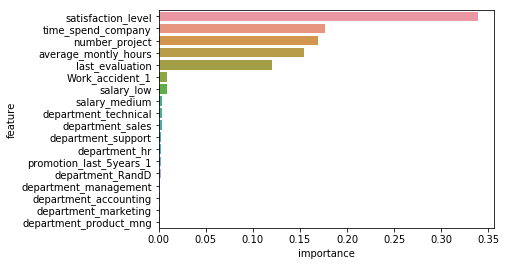

In [95]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank= pd.DataFrame(columns=['rank','feature','importance'])

for f in range(train_x.shape[1]):
 feature_rank.loc[f]=[f+1,
                      train_x.columns[indices[f]],
                      radm_clf.feature_importances_[indices[f]]]

sn.barplot(y='feature',x='importance',data = feature_rank)

# Boosting

In [96]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [97]:
paragrid_ada= { 'n_estimators':[100,200,400,600,800],
              'learning_rate':[10**x for x in range(-3,3)]}

In [101]:
from sklearn.grid_search import GridSearchCV
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=paragrid_ada,cv=5,verbose=True,n_jobs=-1)

In [102]:
gscv_ada.fit(train_x,train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 16.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [103]:
gscv_ada.best_params_

{'learning_rate': 1, 'n_estimators': 600}

In [105]:
clf_ada= gscv_ada.best_estimator_

In [106]:
gscv_ada.best_score_

0.9630802566880573

In [114]:
ad?

In [116]:
ad=AdaBoostClassifier(learning_rate=1.0, n_estimators=600)
ad.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=600, random_state=None)

In [ ]:
gscv_ada.best_params_

clf_ada= gscv_ada.best_estimator_
clf_ada

scv_ada.best_score_

ad=AdaBoostClassifier(learning_rate=0.01, n_estimators=200)
ad.fit(tx,ty)

print(pd.Series(cross_val_score(clf_ada,tx,ty,cv=10)).describe()[['min','mean','max']])
print(pd.Series(cross_val_score(clf_ada,tstx,tsty,cv=10)).describe()[['min','mean','max']])

print(pd.Series(cross_val_score(clf_ada,tstx,tsty,cv=10)))

In [123]:
from sklearn.cross_validation import cross_val_score



In [124]:
print(pd.Series(cross_val_score(clf_ada,train_x,train_y,cv=10)).describe()[['min','mean','max']])
print(pd.Series(cross_val_score(clf_ada,test_x,test_y,cv=10)).describe()[['min','mean','max']])

min     0.954167
mean    0.962830
max     0.974167
dtype: float64
min     0.926421
mean    0.947656
max     0.960000
dtype: float64


In [127]:
pd.Series(cross_val_score(clf_ada,test_x,test_y,cv=10))

0    0.956811
1    0.946844
2    0.926667
3    0.960000
4    0.956667
5    0.956667
6    0.960000
7    0.940000
8    0.926421
9    0.946488
dtype: float64

# Naive Bayes

In [128]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sn
from sklearn.grid_search import GridSearchCV

In [129]:
GaussianNB?


In [130]:
nb_clf =GaussianNB()
nb_clf.fit(train_x,train_y)

GaussianNB(priors=None)

AttributeError: module 'matplotlib' has no attribute 'ylabel'

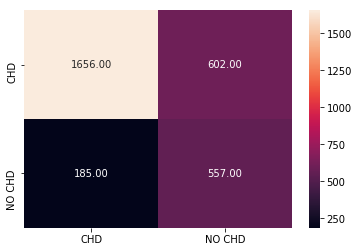

In [134]:
nb_cm= metrics.confusion_matrix(test_y,nb_clf.predict(test_x))
sn.heatmap(nb_cm,annot=True,fmt='.2f',xticklabels= ["CHD", "NO CHD"] , yticklabels = ["CHD", "NO CHD"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [135]:
metrics.accuracy_score(test_y,nb_clf.predict(test_x))

0.7376666666666667

# KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn
from sklearn.grid_search import GridSearchCV

In [137]:
KNeighborsClassifier?

In [143]:
tuned_param = [{'n_neighbors':[3,5,7,9,11]}]

knn_clf= GridSearchCV(KNeighborsClassifier(),
                      tuned_param,cv=5,scoring='accuracy')

In [144]:
knn_clf.fit(train_x,train_y)


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [3, 5, 7, 9, 11]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [145]:
knn_clf.best_score_

0.9396616384698725

In [146]:
knn_clf.best_params_

{'n_neighbors': 3}

In [147]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [148]:
knn_clf.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [151]:
knn_cm = metrics.confusion_matrix(test_y,knn_clf.predict(test_x))

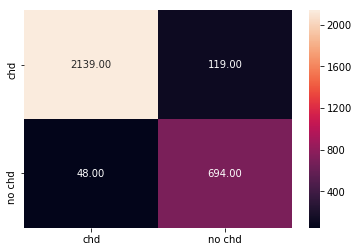

In [153]:
sn.heatmap(knn_cm,annot=True,fmt='.2f',xticklabels=['chd','no chd'],yticklabels=['chd','no chd'])

In [154]:
metrics.accuracy_score(test_y,knn_clf.predict(test_x))

0.9443333333333334

# SVM


In [29]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [156]:
SVC?

In [157]:
svc= SVC(C= 1.0,kernel='linear')

In [158]:
svc.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [162]:
svc_predict = svc.predict(test_x)
svc_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [164]:
svm_cm= metrics.confusion_matrix(test_y,svc_predict)

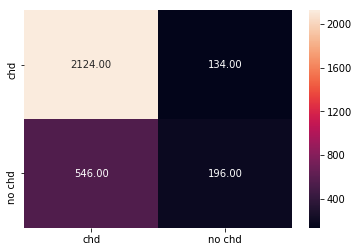

In [166]:
sn.heatmap(svm_cm,annot=True,fmt='.2f',xticklabels=['chd','no chd'],yticklabels=['chd','no chd'])

In [ ]:
tuned_parameters=[{'kernel':['linear'],'C':[1,10,100,1000]}]
clf= GridSearchCV(SVC(C=1),tuned_parameters,cv=5,scoring='accuracy')
clf.fit(train_x,train_y)

In [ ]:
clf

In [ ]:
# clf.fit(train_x,train_y)
clf.best_params_
clf.best_score_

In [ ]:
l_svm_cm = metrices.confusion_matrix(test_y,clf.predict(test_x))

In [ ]:
sn.heatmap(l_svm_cm,annot=True,fmt='.2f',xticklabels=['chd',,'no chd'],yticklabels=['chd',,'no chd'])

# kernal svm(rbf) 

In [ ]:
tuned_param= [{'kernel':['rbf'],'gamma':[1e-3,1e-4],
              'C':[1,10,100,1000]}]

In [ ]:
clf=GridSearchCV(SVC(C=1),
                tuned_param,cv=5,scoring='accuracy')
clf.fit(train_x,train_y)

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

In [ ]:
clf=SVC(kernel='rbf',gamma= 0.001,C=1000)

In [ ]:
from slearn import metrics

In [ ]:
clf.fit(train_x,train_y)

In [ ]:
k_svm_cm= metrics.confusion_marix(test_y,clf.predict(text_x))

In [ ]:
k_svm_cm

In [ ]:
sn.heatmap(k_svm_cm,annot=True,fmt='.2f',xticklabels=['CHD','NO CHD'],yticklabels=['CHD','NO CHD'])

In [ ]:
for k in ['poly','linear','rbf','sigmoid']:
    clf=svm.SVR(kernel=k)
    clf.fit(train_x,train_y)
    print(k,accuracy)